***

# Рынок заведений общественного питания Москвы

# Описание проекта:

Инвесторы решили открыть заведение общественного питания в Москве. Заказчики ещё не знают, что это будет за место: кафе, ресторан, пиццерия, паб или бар, — и какими будут расположение, меню и цены.

# Цель исследования:
Подготовить исследование рынка Москвы, найти интересные особенности и презентовать полученные результаты, которые в будущем помогут в выборе подходящего инвесторам места.

# План работы:
- Провести предобработку;
- Провести исследование рынка общепита в Москве;
- Написать рекомендации;
- Прикрепить ссылку на презентацию исследования.

## Ссылка на презентацию 

https://disk.yandex.ru/i/BfcUzS8nLpN9dw

 ## Загрузка данных и изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as stats
from scipy import stats as st
import math as mth
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import plotly.express as px
from plotly import graph_objects as go
import warnings

**Описание данных**

- name — название заведения;
- address — адрес заведения;
- category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- hours — информация о днях и часах работы;
- lat — широта географической точки, в которой находится заведение;
- lng — долгота географической точки, в которой находится заведение;
- rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
    - «Средний счёт: 1000–1500 ₽»;
    - «Цена чашки капучино: 130–220 ₽»;
    - «Цена бокала пива: 400–600 ₽».
        и так далее;
- middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.
- chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
    - 0 — заведение не является сетевым
    - 1 — заведение является сетевым
- district — административный район, в котором находится заведение, например Центральный административный округ;
- seats — количество посадочных мест.

In [2]:
try:
    df = pd.read_csv('/Users/alig/Desktop/portfolio/yandex_curses/11_общепит_Москвы')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/moscow_places.csv')
df.head()

name  category                              address  \
0                WoWфли      кафе           Москва, улица Дыбенко, 7/1   
1        Четыре комнаты  ресторан   Москва, улица Дыбенко, 36, корп. 1   
2                 Хазри      кафе       Москва, Клязьминская улица, 15   
3  Dormouse Coffee Shop   кофейня  Москва, улица Маршала Федоренко, 12   
4             Иль Марко  пиццерия      Москва, Правобережная улица, 1Б   

                          district  \
0  Северный административный округ   
1  Северный административный округ   
2  Северный административный округ   
3  Северный административный округ   
4  Северный административный округ   

                                               hours        lat        lng  \
0                             ежедневно, 10:00–22:00  55.878494  37.478860   
1                             ежедневно, 10:00–22:00  55.875801  37.484479   
2  пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...  55.889146  37.525901   
3                             ежедневно, 09:00–22:00  55.881608  37.488860   
4                             ежедневно, 10:00–22:00  55.881166  37.449357   

   rating          price                       avg_bill  middle_avg_bill  \
0     5.0            NaN                            NaN              NaN   
1     4.5  выше среднего       Средний счёт:1500–1600 ₽           1550.0   
2     4.6        средние         Средний счёт:от 1000 ₽           1000.0   
3     5.0            NaN  Цена чашки капучино:155–185 ₽              NaN   
4     5.0        средние         Средний счёт:400–600 ₽            500.0   

   middle_coffee_cup  chain  seats  
0                NaN      0    NaN  
1                NaN      0    4.0  
2                NaN      0   45.0  
3              170.0      0    NaN  
4                NaN      1  148.0

In [3]:
# общая информация 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


Представленно 8406 заведений. 

Внутри данные заполнены разным стилем. 

Колонку с количеством мест можно привести к целочисленному формату.

In [4]:
# описание данных
df.describe().round()

lat     lng  rating  middle_avg_bill  middle_coffee_cup   chain  \
count  8406.0  8406.0  8406.0           3149.0              535.0  8406.0   
mean     56.0    38.0     4.0            958.0              175.0     0.0   
std       0.0     0.0     0.0           1010.0               89.0     0.0   
min      56.0    37.0     1.0              0.0               60.0     0.0   
25%      56.0    38.0     4.0            375.0              124.0     0.0   
50%      56.0    38.0     4.0            750.0              169.0     0.0   
75%      56.0    38.0     4.0           1250.0              225.0     1.0   
max      56.0    38.0     5.0          35000.0             1568.0     1.0   

        seats  
count  4795.0  
mean    108.0  
std     123.0  
min       0.0  
25%      40.0  
50%      75.0  
75%     140.0  
max    1288.0

Столбец `rating` - имеет корректные данные, минимальные максимальные оценки в рамках шакалы оценивания (от 0 до 5).

Столбец `middle_avg_bill` - корректные данные, без явных выбросов в значениях.

Столбец `middle_coffee_cup` - данные похожие на истинные.

Столбец `seats` - присутствуют заведения без посадочных мест, а также с очень высоким кол-вом посадочных мест (1288).

Столбец `chain` - следует привести в более удобный для чтения формат.

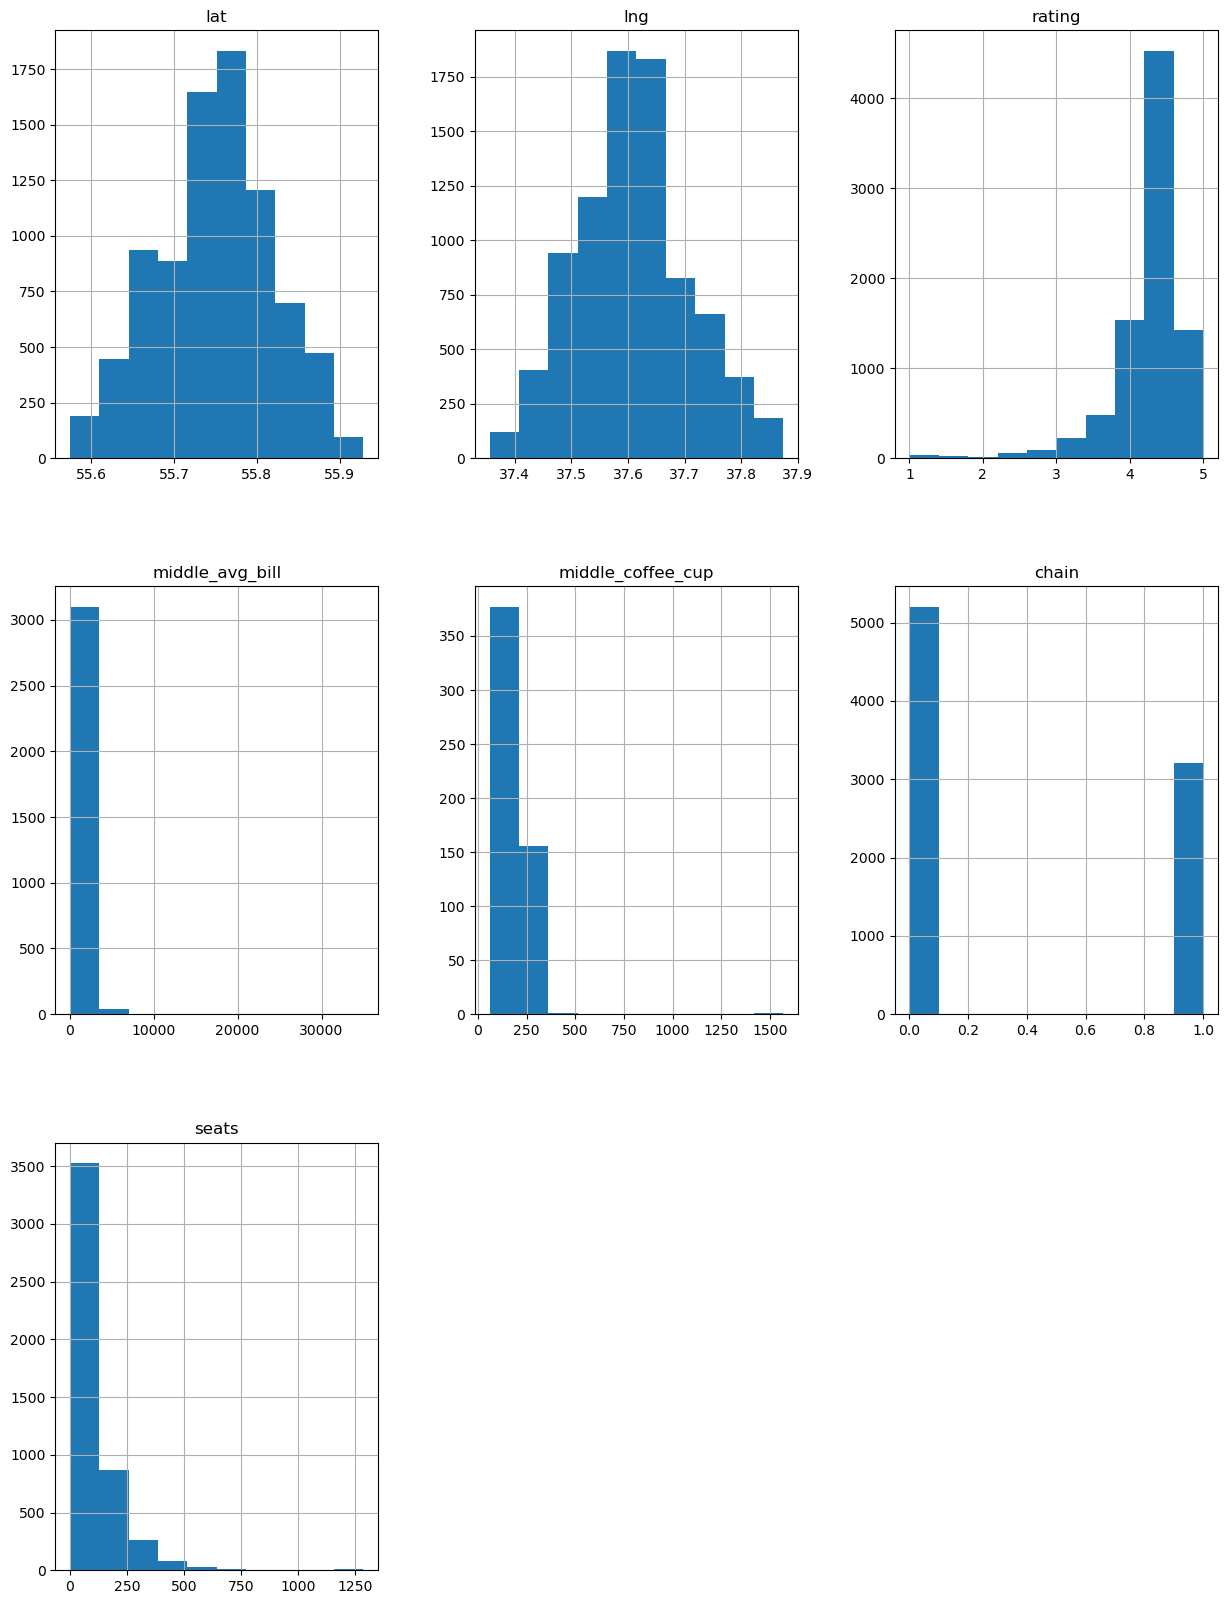

In [5]:
# общие гистограммы
df.hist(figsize=(15, 20))
plt.show()

**Общие гистограммы на данном этапе показывают следующее**:
- в основном у заведений рейтинг в районе 4.5 (шкала от 0 до 5);
- оценка среднего счета в подавляеющем большинстве заведений около 2000 - 3000 р., но есть и выбросы в районе 30000р.;
- оценка одной чашки каппучино в подавляющем большинстве заведений около 200 р., имееются выбросы в районе 1500р.;
- не сетевых заведений - больше;
- в большинстве завдений располагают посадочными местами в диапазоне от 0 до 100. Есть выбросы в районе 1250 посадочных мест.

## Предобработка данных

In [6]:
# проверка на явные дубликаты
df.duplicated().sum()

0

Дубликаты отсутствуют

In [7]:
# проверка на пропуски
pd.DataFrame(round(df.isna().mean()*100)).style.background_gradient()

Пропуски в данных:
 - `middle_coffee_cup` (число с оценкой одной чашки капучино) - 94%;
 - `middle_avg_bill` (число с оценкой среднего чека) - 63%;
 - `price` (категория цен в заведении) - 61%;
 - `avg_bill` (строка, которая хранит среднюю стоимость заказа в виде диапазона) - 55%;
 - `seats` (количество посадочных мест) - 43%;
 - `hours` (информация о днях и часах работы) - 6%.

Пропуски обрабатывать не буду, оставлю как есть. Возможно, пропуски в данных о оценке средней чашки каппучино, среднего чека, категроии цен, средней стоимости заказа и кол-ва посадочных мест, в большинстве случаев приходятся на несетевые заведения. Слишком большой диапазон пропущенных значений, считаю нецелесообразно заменять пропуски средним или медианным значениями. 

Мне нехватает столбца с "id", для удобоства обращения к данным. Создам его и смещу в начало таблицы.

In [8]:
df['id'] = df.index
df.head(1)

name category                     address  \
0  WoWфли     кафе  Москва, улица Дыбенко, 7/1   

                          district                   hours        lat  \
0  Северный административный округ  ежедневно, 10:00–22:00  55.878494   

        lng  rating price avg_bill  middle_avg_bill  middle_coffee_cup  chain  \
0  37.47886     5.0   NaN      NaN              NaN                NaN      0   

   seats  id  
0    NaN   0

In [9]:
# создаю переменную, в которой удалится нужный мне элемент для перемещения
column_to_move = df.pop('id')
# перемещаю новый столбец в начало таблицы
df.insert(0, "id", column_to_move)
df.head()

id                  name  category                              address  \
0   0                WoWфли      кафе           Москва, улица Дыбенко, 7/1   
1   1        Четыре комнаты  ресторан   Москва, улица Дыбенко, 36, корп. 1   
2   2                 Хазри      кафе       Москва, Клязьминская улица, 15   
3   3  Dormouse Coffee Shop   кофейня  Москва, улица Маршала Федоренко, 12   
4   4             Иль Марко  пиццерия      Москва, Правобережная улица, 1Б   

                          district  \
0  Северный административный округ   
1  Северный административный округ   
2  Северный административный округ   
3  Северный административный округ   
4  Северный административный округ   

                                               hours        lat        lng  \
0                             ежедневно, 10:00–22:00  55.878494  37.478860   
1                             ежедневно, 10:00–22:00  55.875801  37.484479   
2  пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...  55.889146  37.525901   
3                             ежедневно, 09:00–22:00  55.881608  37.488860   
4                             ежедневно, 10:00–22:00  55.881166  37.449357   

   rating          price                       avg_bill  middle_avg_bill  \
0     5.0            NaN                            NaN              NaN   
1     4.5  выше среднего       Средний счёт:1500–1600 ₽           1550.0   
2     4.6        средние         Средний счёт:от 1000 ₽           1000.0   
3     5.0            NaN  Цена чашки капучино:155–185 ₽              NaN   
4     5.0        средние         Средний счёт:400–600 ₽            500.0   

   middle_coffee_cup  chain  seats  
0                NaN      0    NaN  
1                NaN      0    4.0  
2                NaN      0   45.0  
3              170.0      0    NaN  
4                NaN      1  148.0

**Обработка неявных дубликатов в названиях заведений**

In [10]:
# для лучшей читаемости, приведу названия заведений к верхнему регистру
df['name'] = df['name'].str.upper()
# группирую названия уникальных заведений по id и вывожу их количество
df.groupby('name').agg({'id': 'nunique'}).sort_values(by='id', ascending=False).head(60)

id
name                                    
КАФЕ                                 189
ШОКОЛАДНИЦА                          120
ДОМИНО'С ПИЦЦА                        77
ДОДО ПИЦЦА                            74
ONE PRICE COFFEE                      72
ЯНДЕКС ЛАВКА                          69
COFIX                                 65
PRIME                                 50
ХИНКАЛЬНАЯ                            44
ШАУРМА                                43
КОФЕПОРТ                              42
КУЛИНАРНАЯ ЛАВКА БРАТЬЕВ КАРАВАЕВЫХ   39
ТЕРЕМОК                               38
ЧАЙХАНА                               37
РЕСТОРАН                              34
БУХАНКА                               32
COFEFEST                              32
СТОЛОВАЯ                              28
МУ-МУ                                 27
DRIVE CAFÉ                            24
КОФЕМАНИЯ                             23
КРОШКА КАРТОШКА                       22
АНДЕРСОН                              22
СКАЛКА                                20
CINNABON                              20
FRENCH BAKERY                         20
ХЛЕБ НАСУЩНЫЙ                         19
ТАНУКИ                                19
ШТОЛЛЕ                                19
АРАМЬЕ                                18
VASILCHUKÍ CHAIHONA №1                17
ДОНЕР КЕБАБ                           16
WILD BEAN CAFE                        16
OSTERIA MARIO                         16
СУШИСТОР                              16
МСК LOUNGE                            15
КАФЕТЕРИЙ                             15
МОРЕМАНИЯ                             15
ПРАВДА КОФЕ                           14
PIZZA EXPRESS 24                      14
ВАРЕНИЧНАЯ № 1                        14
БУРГЕР КИНГ                           14
BRASSERIE LAMBIC                      13
АЛЛО! ПИЦЦА                           13
PIZZA HUT                             12
БИСТРО                                12
КОФЕЙНЯ                               12
ДЖОНДЖОЛИ                             12
КАФЕ-СТОЛОВАЯ                         11
КАФЕ-БАР                              10
ХАЛЯЛЬ                                10
СТЕЙК & БУРГЕР                         9
KRISPY KREME                           9
ФРАНКЛИНС БУРГЕР                       9
САМАРКАНД                              9
BỔ                                     9
PHOBO                                  9
ДАБЛБИ                                 9
ВОЛКОНСКИЙ                             9
UDCКАФЕ                                8

В самых массовых по кол-ву заведениях, неявные дубликаты не обнаружены. Этих данных достаточно, чтобы продолжить исследование, не боясь искажений в данных.

**Проверка на неявные дубликаты**

In [11]:
df[['name', 'address']].duplicated().sum()

3

In [12]:
df[df[['name', 'address']].duplicated(keep=False)]

id                       name  category  \
1430  1430                  MORE POKE  ресторан   
1511  1511                  MORE POKE  ресторан   
2211  2211  РАКОВАРНЯ КЛЕШНИ И ХВОСТЫ  ресторан   
2420  2420  РАКОВАРНЯ КЛЕШНИ И ХВОСТЫ   бар,паб   
3091  3091            ХЛЕБ ДА ВЫПЕЧКА  булочная   
3109  3109            ХЛЕБ ДА ВЫПЕЧКА      кафе   

                                      address  \
1430  Москва, Волоколамское шоссе, 11, стр. 2   
1511  Москва, Волоколамское шоссе, 11, стр. 2   
2211               Москва, проспект Мира, 118   
2420               Москва, проспект Мира, 118   
3091              Москва, Ярцевская улица, 19   
3109              Москва, Ярцевская улица, 19   

                                     district  \
1430          Северный административный округ   
1511          Северный административный округ   
2211  Северо-Восточный административный округ   
2420  Северо-Восточный административный округ   
3091          Западный административный округ   
3109          Западный административный округ   

                                                  hours        lat        lng  \
1430                             ежедневно, 09:00–21:00  55.806307  37.497566   
1511  пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...  55.806307  37.497566   
2211                             ежедневно, 12:00–00:00  55.810553  37.638161   
2420  пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...  55.810677  37.638379   
3091                             ежедневно, 09:00–22:00  55.738886  37.411648   
3109                                                NaN  55.738449  37.410937   

      rating price avg_bill  middle_avg_bill  middle_coffee_cup  chain  seats  
1430     4.2   NaN      NaN              NaN                NaN      0  188.0  
1511     4.2   NaN      NaN              NaN                NaN      1  188.0  
2211     4.4   NaN      NaN              NaN                NaN      0  150.0  
2420     4.4   NaN      NaN              NaN                NaN      1  150.0  
3091     4.1   NaN      NaN              NaN                NaN      1  276.0  
3109     4.1   NaN      NaN              NaN                NaN      0  276.0

In [13]:
df = df.drop_duplicates(subset=['name', 'address'], keep='last')

In [14]:
df[['name', 'address']].duplicated().sum()

0

Удалены 4 заведения дублирующиеся по названию заведения и адресу

**Приведу колонки с названием места, категорией, адресом, районом, часами работы и средним счетом к нижнему регистру**

In [15]:
#df.head(1)
df['name'] = df['name'].str.lower()
df['category'] = df['category'].str.lower()
df['address'] = df['address'].str.lower()
df['district'] = df['district'].str.lower()
df['hours'] = df['hours'].str.lower()
df['avg_bill'] = df['avg_bill'].str.lower()

In [16]:
#df.head()

### Создание столбца "stereet" с названием улиц

In [17]:
# создам функцию, которая "вытащит" название улиц из столбца с адресом заведения
def street_name(df):
# разделение текста
    split_text = df.split(',')
# выделение названий улиц   
    a1 = split_text[1::3]
    return ''.join(a1)

# создаю колонку с названием улиц
df['street'] = df['address'].apply(street_name)
df.head()

id                  name  category                              address  \
0   0                wowфли      кафе           москва, улица дыбенко, 7/1   
1   1        четыре комнаты  ресторан   москва, улица дыбенко, 36, корп. 1   
2   2                 хазри      кафе       москва, клязьминская улица, 15   
3   3  dormouse coffee shop   кофейня  москва, улица маршала федоренко, 12   
4   4             иль марко  пиццерия      москва, правобережная улица, 1б   

                          district  \
0  северный административный округ   
1  северный административный округ   
2  северный административный округ   
3  северный административный округ   
4  северный административный округ   

                                               hours        lat        lng  \
0                             ежедневно, 10:00–22:00  55.878494  37.478860   
1                             ежедневно, 10:00–22:00  55.875801  37.484479   
2  пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...  55.889146  37.525901   
3                             ежедневно, 09:00–22:00  55.881608  37.488860   
4                             ежедневно, 10:00–22:00  55.881166  37.449357   

   rating          price                       avg_bill  middle_avg_bill  \
0     5.0            NaN                            NaN              NaN   
1     4.5  выше среднего       средний счёт:1500–1600 ₽           1550.0   
2     4.6        средние         средний счёт:от 1000 ₽           1000.0   
3     5.0            NaN  цена чашки капучино:155–185 ₽              NaN   
4     5.0        средние         средний счёт:400–600 ₽            500.0   

   middle_coffee_cup  chain  seats                    street  
0                NaN      0    NaN             улица дыбенко  
1                NaN      0    4.0             улица дыбенко  
2                NaN      0   45.0        клязьминская улица  
3              170.0      0    NaN   улица маршала федоренко  
4                NaN      1  148.0       правобережная улица

Проверю пропуски в новом столбце с названием улиц

In [18]:
df[df['street'].isnull()]['id'].count()

0

Все ячейки в колонке заполнены

### Столбец "is_24/7" - для обозначений заведений, которые работают круглосуточно каждый день

Если заведение работает "ежедневно" и "круглосуточно", то логическое значение в новом столбце будет - True, в противоположном случае - False

Выведу кол-во значений в колонке с режимом работы

In [19]:
df['hours'].value_counts().head(60)

ежедневно, 10:00–22:00                                  759
ежедневно, круглосуточно                                730
ежедневно, 11:00–23:00                                  396
ежедневно, 10:00–23:00                                  310
ежедневно, 12:00–00:00                                  253
ежедневно, 09:00–21:00                                  203
ежедневно, 09:00–22:00                                  183
ежедневно, 12:00–23:00                                  178
ежедневно, 08:00–23:00                                  160
ежедневно, 08:00–22:00                                  148
ежедневно, 09:00–23:00                                  140
ежедневно, 11:00–00:00                                  127
ежедневно, 10:00–21:00                                  103
пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00–22:00     89
ежедневно, 10:00–00:00                                   79
ежедневно, 08:00–21:00                                   73
пн-пт 08:00–19:00                       

**Создание столбца**

In [20]:
df['is_24/7'] = np.where(df['hours'] == 'ежедневно, круглосуточно', True, False)

In [21]:
#df.head(50)

### Обработка аномальных значений

In [22]:
#df.head()

**Обработка аномалий в посадочных местах**

Построю график "ящик с усами", т.к. для данного исследования он является наиболее информативным.

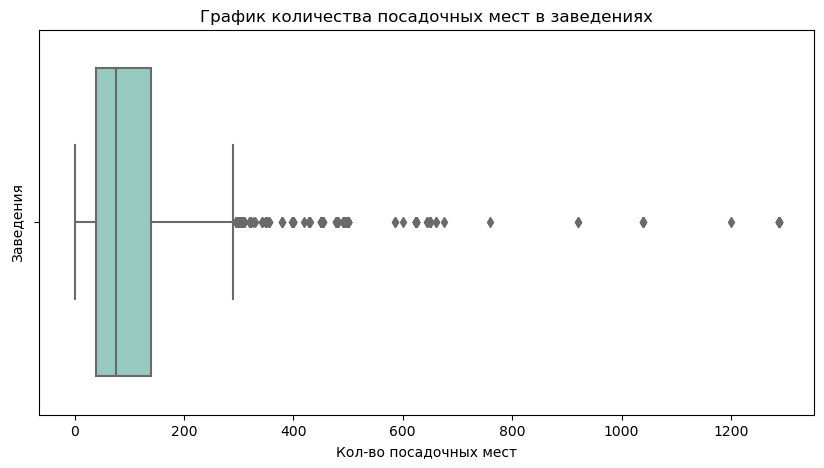

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='seats', palette="Set3")
plt.title('График количества посадочных мест в заведениях')
plt.xlabel('Кол-во посадочных мест')
plt.ylabel('Заведения')
plt.show()

Присутствуют выбросы в районе 1400 посадочных мест. Инвесторы собираются освоить новый для себя бизнес, наивно было бы предполагать, что они начнуть вкладывать инвестиции в огромные банкетные залы или рестораны с большой вместимостью людей. Учитывая начальный тест новой ниши, в последствии, я уберу заведения, в которых кол-во посадочных мест больше 250. В этом диапазоне можно открыть любой тип общепита.

Создам переменную, чтобы узнать кол-во заведений, в которых нет посадочных мест.

In [24]:
no_seats = df.query('seats == 0')
no_seats.head(5)

id              name  category  \
84    84  meat doner kebab  булочная   
177  177            арамье  булочная   
196  196      донер-шашлык  ресторан   
203  203        тандыр № 1      кафе   
211  211  неаполитан пицца      кафе   

                                         address  \
84                     москва, улица лескова, 22   
177  москва, улица 800-летия москвы, 22, корп. 2   
196                    москва, улица лескова, 22   
203                   москва, улица лескова, 22г   
211                   москва, улица пришвина, 23   

                                    district                     hours  \
84   северо-восточный административный округ  ежедневно, круглосуточно   
177          северный административный округ    ежедневно, 09:00–21:00   
196  северо-восточный административный округ  ежедневно, круглосуточно   
203  северо-восточный административный округ  ежедневно, круглосуточно   
211  северо-восточный административный округ    ежедневно, 12:00–23:00   

           lat        lng  rating price            avg_bill  middle_avg_bill  \
84   55.896987  37.608126     4.5   NaN  средний счёт:300 ₽            300.0   
177  55.879392  37.556832     4.0   NaN                 NaN              NaN   
196  55.896962  37.608300     4.5   NaN                 NaN              NaN   
203  55.895615  37.611049     4.0   NaN                 NaN              NaN   
211  55.885416  37.604650     4.3   NaN                 NaN              NaN   

     middle_coffee_cup  chain  seats                   street  is_24/7  
84                 NaN      0    0.0            улица лескова     True  
177                NaN      1    0.0   улица 800-летия москвы    False  
196                NaN      0    0.0            улица лескова     True  
203                NaN      1    0.0            улица лескова     True  
211                NaN      0    0.0           улица пришвина    False

In [25]:
# создадам таблицу с обозначением сетевых/несетевых заведений и их количеством
ratio_object_with_no_seats = (
                     no_seats.groupby('chain').agg({'id': 'count'})
                     .sort_values(by='id', ascending=False)
                     .reset_index()
                    )
ratio_object_with_no_seats.columns = ['object_type','count']
ratio_object_with_no_seats

object_type  count
0            0     86
1            1     50

**График долей сетевых и несетевых заведений, в которых нет посадочных мест**

In [26]:
fig = go.Figure(data=[go.Pie(labels=ratio_object_with_no_seats['object_type'],\
                             values=ratio_object_with_no_seats['count'])])
fig.update_layout(title='Соотношение сетевых к несетвым заведениям,в которых нет посадочных мест', # указываем заголовок графика
                  width=800, # указываем размеры графика
                  height=500,
                  annotations=[dict(x=1.12, # вручную настраиваем аннотацию легенды
                                    y=1.05,
                                    text='Статус заведения',
                                    showarrow=False)])
fig.show() # выводим график

Несетвых заведений, в которых нет посадочных мест больше, чем сетевых. 

Удалять или изменять данные я не буду, т.к. это заведения, которые вполне могут работать не имея посадочных мест. Эту информацию следует учитывать для инвесторов и дальнейшего анализа.

**Проверю, есть ли ошибки а написании названий**

In [27]:
df.groupby('name').agg({'id': 'nunique'}).sort_values(by='id', ascending=False)[:10]

id
name                 
кафе              189
шоколадница       120
домино'с пицца     77
додо пицца         74
one price coffee   72
яндекс лавка       69
cofix              65
prime              50
хинкальная         44
шаурма             43

In [28]:
df[df['name'].str.contains('домино')]['name'].unique() 

array(["домино'с пицца", 'доминос пицца', "домино'с"], dtype=object)

Создам функцию

In [29]:
def replace_wrong_names(wrong_names, correct_name):
    df['name']= df['name'].replace(wrong_names, correct_name)

In [30]:
replace_wrong_names(("доминос пицца","домино'с"),"домино'с пицца")

In [31]:
df[df['name'].str.contains('домино')]['name'].unique() 

array(["домино'с пицца"], dtype=object)

In [32]:
df[df['name'].str.contains('додо')]['name'].unique() 

array(['додо пицца'], dtype=object)

In [33]:
df[df['name'].str.contains('cofix')]['name'].unique() 

array(['cofix'], dtype=object)

In [34]:
df[df['name'].str.contains('шоколад')]['name'].unique() 

array(['шоколадница', 'шоколадка', 'торты от сети кофеен шоколадница',
       'улитка в шоколаде', 'шоколад', 'шоколад имбирь корица'],
      dtype=object)

## Анализ данных

### Категории заведений

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по категориям: рестораны, кофейни, пиццерии, бары и так далее. Постройте визуализации. Ответьте на вопрос о распределении заведений по категориям.

Уникальные категории

In [35]:
df['category'].unique()

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

В новой переменной группирую данные по категориям и посчитаю их количество.

In [36]:
category_obj = df.groupby('category').agg({'id': 'count'}).sort_values(by='id', ascending=False).reset_index()
category_obj

category    id
0             кафе  2378
1         ресторан  2041
2          кофейня  1413
3          бар,паб   765
4         пиццерия   633
5  быстрое питание   603
6         столовая   315
7         булочная   255

In [37]:
fig = px.bar(category_obj, x='category', y='id', title='Категории заведений и их количество')
fig.update_xaxes(tickangle=45)
fig.update_xaxes(title_text='Категория') 
fig.update_yaxes(title_text='Кол-во посадочных мест')
fig.show()

**Круговая диаграмма по категориям заведений и их отношению к общему кол-ву заведений**

In [38]:
fig = go.Figure(data=[go.Pie(labels=category_obj['category'], values=category_obj['id'])])
fig.update_layout(title='Соотношение категорий заведений', 
                  width=800, 
                  height=500,
                  annotations=[dict(x=1.12, 
                                    y=1.05,
                                    text='Категория заведения',
                                    showarrow=False)])
fig.show()

Всего 8 категорий. Первая тройка лидеров по количеству: "Кафе", "Рестораны", "Кофейни". Чуть менее популярны, но находятся практически на одном уровне по количеству заведений: "Бары/пабы", "Пиццерии", "Быстрое питание". Меньше всего "Столовый" и "Булочных".

### Количество посадочных мест

#### Переменная с фильтром в данных по кол-ву посадочных мест "df_filter_seats"

In [39]:
df_filter_seats = df.query('seats <= 250').reset_index()
df_filter_seats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4393 entries, 0 to 4392
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              4393 non-null   int64  
 1   id                 4393 non-null   int64  
 2   name               4393 non-null   object 
 3   category           4393 non-null   object 
 4   address            4393 non-null   object 
 5   district           4393 non-null   object 
 6   hours              4114 non-null   object 
 7   lat                4393 non-null   float64
 8   lng                4393 non-null   float64
 9   rating             4393 non-null   float64
 10  price              1866 non-null   object 
 11  avg_bill           2155 non-null   object 
 12  middle_avg_bill    1802 non-null   float64
 13  middle_coffee_cup  275 non-null    float64
 14  chain              4393 non-null   int64  
 15  seats              4393 non-null   float64
 16  street             4393 

**Диаграмма размаха с отфильтрованными данными по кол-ву посадочных мест, типом и категорией заведения(сетевой/несетевой)**

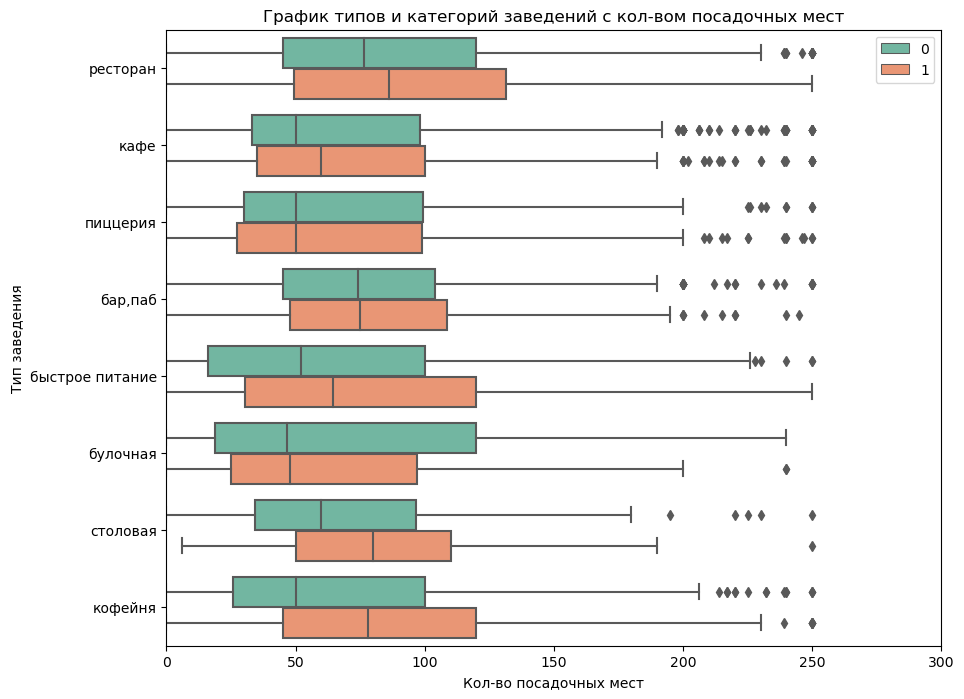

In [40]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data=df_filter_seats, x='seats', y='category', hue='chain', palette='Set2')
ax.set_xlim(0,300)
plt.title('График типов и категорий заведений с кол-вом посадочных мест')
plt.xlabel('Кол-во посадочных мест')
plt.ylabel('Тип заведения')
plt.legend()
plt.show()

В основном, категории заведений распределены практически поровну во всех типах. Есть заведения с болшим кол-вом посадочных мест, но основной диапазон во всех заведениях от 25 до 125 посадочных мест. Считаю правильным решением, сокращение по сидячим местам до 250.

Создам переменную, с средним количеством посадочных мест для каждой категории заведения

In [41]:
mean_seats = round(df.groupby(by='category')['seats'].median()).sort_values(ascending=False).reset_index()
mean_seats

category  seats
0         ресторан   86.0
1          бар,паб   82.0
2          кофейня   80.0
3         столовая   76.0
4  быстрое питание   65.0
5             кафе   60.0
6         пиццерия   55.0
7         булочная   50.0

Построю график с средним показателем посадочных мест в каждой категории заведения

In [42]:
fig = px.bar(mean_seats, x='category', y='seats', title='Среднее кол-во посадочных мест в каждой категории заведений')
fig.update_xaxes(tickangle=45)
fig.update_xaxes(title_text='Категория') 
fig.update_yaxes(title_text='Кол-во посадочных мест')
fig.show()

Среднее кол-во посадочных мест покатегориям:
 - Рестораны - 86;
 - Бары,пабы - 82;
 - Кофейни - 80;
 - Столовые - 76;
 - Быстрое питание - 65;
 - Кафе - 60;
 - Пиццерии - 55;
 - Булочные - 50.

Вывел медианное значение по кол-ву сидячих мест. Значение 250 выбрал исходя из боксплота. Т.к. верхняя граница у категорий "быстрое питание" и "ресторан" как раз на этой отметке была.

### Cоотношение сетевых и несетевых заведений в датасете.

In [43]:
df_chain_or_not = df.groupby('chain').agg(count=('id','count')).reset_index()
df_chain_or_not

chain  count
0      0   5199
1      1   3204

In [44]:
#fig = newLegend(fig = df_chain_or_not, newNames = {'0':'0 = несетевое',
#                                       '1' : '1 = сетевое'})
fig = go.Figure(data=[go.Pie(labels=df_chain_or_not['chain'],\
                             values=df_chain_or_not['count'])])
fig.update_layout(title='Соотношение сетевых к несетвым заведениям', # указываем заголовок графика
                  width=800, # указываем размеры графика
                  height=500,
                  annotations=[dict(x=1.12, # вручную настраиваем аннотацию легенды
                                    y=1.05,
                                    text='Статус заведения',
                                    showarrow=False)])
#fig.figlegend(['0-Несетевые', '1-Сетевые'])

fig.show() # выводим график

Несетвых заведений гораздо больше - 61.9%, сетевые заведения составляют - 38.1%.

### Какие категории заведений чаще являются сетевыми? 

**График соотношения сетевых к несетвым по категориям**

chain               0    1  total  ratio
category                                
булочная           99  156    255   0.61
пиццерия          303  330    633   0.52
кофейня           693  720   1413   0.51
быстрое питание   371  232    603   0.38
ресторан         1311  730   2041   0.36
кафе             1599  779   2378   0.33
столовая          227   88    315   0.28
бар,паб           596  169    765   0.22

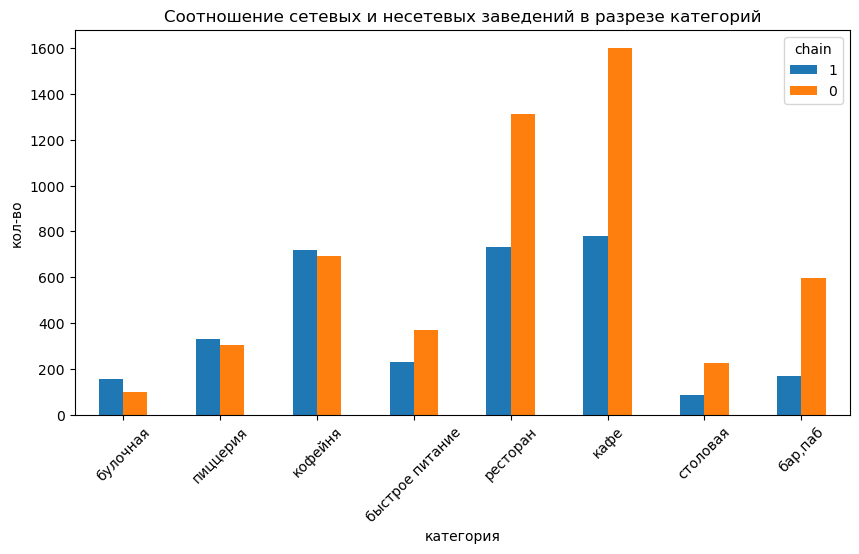

In [45]:
chain_or_not = df.pivot_table(index = 'category', columns = 'chain', values = 'id', aggfunc = 'count')
chain_or_not['total'] = chain_or_not[1] + chain_or_not[0]
chain_or_not['ratio'] = round(chain_or_not[1] / chain_or_not['total'], 2)
chain_or_not = chain_or_not.sort_values(by='ratio', ascending=False)
display(chain_or_not)

chain_or_not[[1, 0]].plot(kind='bar', figsize=(10, 5))
plt.ylabel('кол-во')
plt.xlabel('категория')
plt.xticks(rotation=45)
plt.title('Cоотношение сетевыx и несетевых заведений в разрезе категорий');

Категории, в которых сетевых заведений больше, чем несетвых:
 - Булочные
 - Пиццерии
 - Кофейни
 
Категории, в которых несетевых заведений больше: 
   - Быстрое питание
   - Кафе
   - Рестораны
   - Столовые
   - Бары, пабы
    

###  Топ-15 популярных сетей в Москве

In [46]:
top_15_chain = df.query('chain == 1')\
    .groupby('name', as_index=False)\
    .agg(count_object=('name', 'count'))\
    .sort_values(by='count_object', ascending=False)
top_15_chain.head(20)

name  count_object
729                          шоколадница           120
335                       домино'с пицца            76
331                           додо пицца            74
146                     one price coffee            71
742                         яндекс лавка            69
58                                 cofix            65
168                                prime            50
664                           хинкальная            44
409                             кофепорт            42
418  кулинарная лавка братьев караваевых            39
628                              теремок            38
683                              чайхана            37
39                              cofefest            32
267                              буханка            32
477                                му-му            27
69                            drive café            24
408                            кофемания            23
413                      крошка картошка            22
231                             андерсон            22
87                         french bakery            20

Не все названия заведений являются сетевыми. Уберу из списка "Яндекс Лавка", "Хинкальная". 

In [47]:
top_15_chain = top_15_chain[~top_15_chain['name'].isin(['яндекс лавка', 'хинкальная'])][:15]
top_15_chain

name  count_object
729                          шоколадница           120
335                       домино'с пицца            76
331                           додо пицца            74
146                     one price coffee            71
58                                 cofix            65
168                                prime            50
409                             кофепорт            42
418  кулинарная лавка братьев караваевых            39
628                              теремок            38
683                              чайхана            37
39                              cofefest            32
267                              буханка            32
477                                му-му            27
69                            drive café            24
408                            кофемания            23

Построю график

In [48]:
fig = px.bar(top_15_chain, x='name', y='count_object', title='Топ 15 сетевых заведений')
fig.update_xaxes(tickangle=45)
fig.update_xaxes(title_text='Название заведения') 
fig.update_yaxes(title_text='Количество')
fig.show()

В основном, топ состоит из кофеен. 

### Административные районы Москвы в датасете

In [49]:
df['district'].unique()

array(['северный административный округ',
       'северо-восточный административный округ',
       'северо-западный административный округ',
       'западный административный округ',
       'центральный административный округ',
       'восточный административный округ',
       'юго-восточный административный округ',
       'южный административный округ',
       'юго-западный административный округ'], dtype=object)

In [50]:
# строим гистограммы
fig = px.histogram(df, # загружаем данные
                   x='district', # указываем столбец с данными для оси X
                   color='category', # обозначаем категорию для разделения цветом
                   range_x=[0, 9], # ограничиваем ось X
                   title='График категорий заведений по округам Москвы', # указываем заголовок
                   nbins=9, # назначаем число корзин
                   barmode='overlay') # выбираем «полупрозрачный» тип отображения столбцов
fig.update_xaxes(title_text='Название округа') # подпись для оси X
fig.update_yaxes(title_text='категории заведений') # подпись для оси Y
fig.show() # выводим график

Больше всего заведений в ЦАО. В осном в центре находятся рестораны, кафе, кофейни и бары/пабы. СВАО, ВАО, ЮВАО имеют приблизительно одинаковое кол-во заведений. Меньше всего заведений в СЗАО.

In [51]:
category_district = df.groupby('district')\
    .size()\
    .to_frame()\
    .sort_values([0], ascending=False).reset_index()
category_district.columns = ['district', 'count']
category_district

district  count
0       центральный административный округ   2242
1          северный административный округ    899
2             южный административный округ    892
3  северо-восточный административный округ    890
4          западный административный округ    850
5         восточный административный округ    798
6     юго-восточный административный округ    714
7      юго-западный административный округ    709
8   северо-западный административный округ    409

In [52]:
fig = px.histogram(category_district, x='district', y = 'count',\
                    title='График категорий заведений по округам Москвы')

fig.update_xaxes(title_text='Название округа') 
fig.update_yaxes(title_text='Категории заведений') 
fig.show() 

### Средние рейтинги по категориям заведений

In [53]:
rating = round(df.groupby('category').mean()[['rating']], 2).reset_index()
rating

category  rating
0          бар,паб    4.39
1         булочная    4.27
2  быстрое питание    4.05
3             кафе    4.12
4          кофейня    4.28
5         пиццерия    4.30
6         ресторан    4.29
7         столовая    4.21

In [54]:
fig = px.bar(rating, x='category', y='rating', title='Средний показатель рейтинга по категориям заведений')
fig.update_xaxes(title_text='Категории') 
fig.update_yaxes(title_text='Оценка')
fig.show()

In [55]:
print(f'Среднее значение рейтинга по всем категориям:' , round(df['rating'].mean(), 2))

Среднее значение рейтинга по всем категориям: 4.23


Средние показатели рейтинга в каждой категории:
 - бар/паб - 4.39
 - булочная - 4.27
 - быстрое питание - 4.05
 - кафе - 4.12
 - кофейня - 4.28
 - пиццерия - 4.3
 - ресторан - 4.29
 - столовая - 4.21
 
Среднее значение рейтинга несильно различается по категориям. Можно выделить две категории, с более низкими значениями: "Кафе", "Быстрое питание"

### Средний рейтинг заведений каждого района

In [56]:
district_mean = df.groupby('district', as_index=False)['rating'].agg('mean').sort_values(by='rating', ascending=False)
district_mean

district    rating
5       центральный административный округ  4.377520
2          северный административный округ  4.239822
4   северо-западный административный округ  4.208802
8             южный административный округ  4.184417
1          западный административный округ  4.181647
0         восточный административный округ  4.174185
7      юго-западный административный округ  4.172920
3  северо-восточный административный округ  4.147978
6     юго-восточный административный округ  4.101120

### Все заведения датасета на карте

In [57]:
import folium
import json
from folium import Map, Choropleth, Marker

### Топ-15 улиц по количеству заведений


In [59]:
top_st_data = df.pivot_table(index='street', values='name', aggfunc='count')\
    .sort_values(by='name', ascending=False).head(15)
# соделаем отдельно список топ-15 улиц
top_st = top_st_data.index
top_st_data

name
street                       
 проспект мира            183
 профсоюзная улица        120
 проспект вернадского     107
 ленинский проспект       107
 ленинградский проспект    93
 дмитровское шоссе         86
 варшавское шоссе          76
 ленинградское шоссе       70
 каширское шоссе           66
 люблинская улица          60
 улица вавилова            55
 кутузовский проспект      54
 улица миклухо-маклая      49
 мкад                      48
 пятницкая улица           48

In [60]:
top_st_data = df.query('street in @top_st')
top_st_data.head(5)

id                name  category  \
8    8         donna maria  ресторан   
12  12            заправка      кафе   
17  17  чайхана беш-бармак  ресторан   
26  26            пикочино  пиццерия   
28  28                mafe      кафе   

                                     address                         district  \
8    москва, дмитровское шоссе, 107, корп. 4  северный административный округ   
12            москва, мкад, 80-й километр, 1  северный административный округ   
17  москва, ленинградское шоссе, 71б, стр. 2  северный административный округ   
26          москва, дмитровское шоссе, 107к2  северный административный округ   
28         москва, мкад, 78-й километр, 14к1  северный административный округ   

                                                hours        lat        lng  \
8                              ежедневно, 10:00–22:00  55.880045  37.539006   
12                                  вт-сб 09:00–18:00  55.899938  37.517958   
17                           ежедневно, круглосуточно  55.876908  37.449876   
26  пн-чт 11:00–22:00; пт,сб 11:00–23:00; вс 11:00...  55.879390  37.541228   
28                             ежедневно, 10:00–19:00  55.893061  37.501319   

    rating    price                 avg_bill  middle_avg_bill  \
8      4.8  средние    средний счёт:от 500 ₽            500.0   
12     4.3  средние       средний счёт:330 ₽            330.0   
17     4.4  средние   средний счёт:350–500 ₽            425.0   
26     4.5  средние  средний счёт:300–1500 ₽            900.0   
28     3.8  средние   средний счёт:400–600 ₽            500.0   

    middle_coffee_cup  chain  seats                street  is_24/7  
8                 NaN      0   79.0     дмитровское шоссе    False  
12                NaN      0    NaN                  мкад    False  
17                NaN      0   96.0   ленинградское шоссе     True  
26                NaN      0    NaN     дмитровское шоссе    False  
28                NaN      0    NaN                  мкад    False

In [61]:
# строим гистограммы
fig = px.histogram(top_st_data, # загружаем данные
                   x='street', # указываем столбец с данными для оси X
                   color='category', # обозначаем категорию для разделения цветом
                   range_x=[0, 14], # ограничиваем ось X
                   title='Топ-15 улиц по кол-ву заведений с разбивкой по категориям', # указываем заголовок
                   nbins=15, # назначаем число корзин
                   barmode='overlay') # выбираем «полупрозрачный» тип отображения столбцов
fig.update_xaxes(title_text='Название улицы') # подпись для оси X
fig.update_yaxes(title_text='Категории заведений') # подпись для оси Y
fig.show() # выводим график

In [62]:
top_15_st = top_st_data.groupby('street')\
    .size()\
    .to_frame()\
    .sort_values([0], ascending=False).reset_index()
top_15_st.columns = ['street', 'count']

top_15_st

street  count
0             проспект мира    183
1         профсоюзная улица    120
2        ленинский проспект    107
3      проспект вернадского    107
4    ленинградский проспект     93
5         дмитровское шоссе     86
6          варшавское шоссе     76
7       ленинградское шоссе     70
8           каширское шоссе     66
9          люблинская улица     60
10           улица вавилова     55
11     кутузовский проспект     54
12     улица миклухо-маклая     49
13                     мкад     48
14          пятницкая улица     48

In [63]:
fig = px.histogram(top_15_st, x='street', y = 'count',\
                    title='Топ-15 улиц по кол-ву заведений')

fig.update_xaxes(title_text='Название улицы') 
fig.update_yaxes(title_text='Кол-во заведений') 
fig.show() 

Самые популярные улицы - проспект Мира, МКАД, Ленинский проспект, проспект Вернадского, Профсоюзная улица. Преобладающая категория - кафе.

### Улицы, на которых находится только один объект общепита

In [64]:
one_obj = df.pivot_table(index='street', values='name', aggfunc='count').sort_values(by='name')
one_obj.columns = ['count']
one_obj = one_obj[one_obj['count'] == 1]
one_obj

count
street                              
 1-й автозаводский проезд          1
 парк борисовские пруды            1
 парк братеевская набережная       1
 парк дружбы                       1
 парк зюзино                       1
...                              ...
 будайский проезд                  1
 1-й николощеповский переулок      1
 городецкая улица                  1
 глубокий переулок                 1
 братиславский парк                1

[541 rows x 1 columns]

In [65]:
# список улиц
one_count_st = one_obj.index
# датафрейм с этими улицами
one_obj_data = df.query('street in @one_count_st')
one_obj_data.head()

id                name  category  \
15  15           дом обеда  столовая   
21  21                7/12      кафе   
25  25     в парке вкуснее   кофейня   
58  58       coffeekaldi's   кофейня   
60  60  чебуречная история   кофейня   

                                      address  \
15         москва, улица бусиновская горка, 2   
21               москва, прибрежный проезд, 7   
25                  москва, парк левобережный   
58        москва, угличская улица, 13, стр. 8   
60  москва, ландшафтный заказник лианозовский   

                                   district  \
15          северный административный округ   
21          северный административный округ   
25          северный административный округ   
58  северо-восточный административный округ   
60  северо-восточный административный округ   

                                hours        lat        lng  rating    price  \
15  пн-пт 08:30–18:30; сб 10:00–20:00  55.885890  37.493264     4.1  средние   
21             ежедневно, 10:00–22:00  55.876805  37.464934     4.5      NaN   
25             ежедневно, 10:00–21:00  55.878453  37.460028     4.3      NaN   
58             ежедневно, 09:00–22:00  55.900316  37.570558     4.1  средние   
60             ежедневно, 10:00–22:00  55.899845  37.570488     4.9      NaN   

                  avg_bill  middle_avg_bill  middle_coffee_cup  chain  seats  \
15  средний счёт:300–500 ₽            400.0                NaN      0  180.0   
21                     NaN              NaN                NaN      0    NaN   
25                     NaN              NaN                NaN      1    NaN   
58  средний счёт:500–800 ₽            650.0                NaN      1    NaN   
60                     NaN              NaN                NaN      1    NaN   

                                street  is_24/7  
15             улица бусиновская горка    False  
21                   прибрежный проезд    False  
25                   парк левобережный    False  
58                     угличская улица    False  
60   ландшафтный заказник лианозовский    False

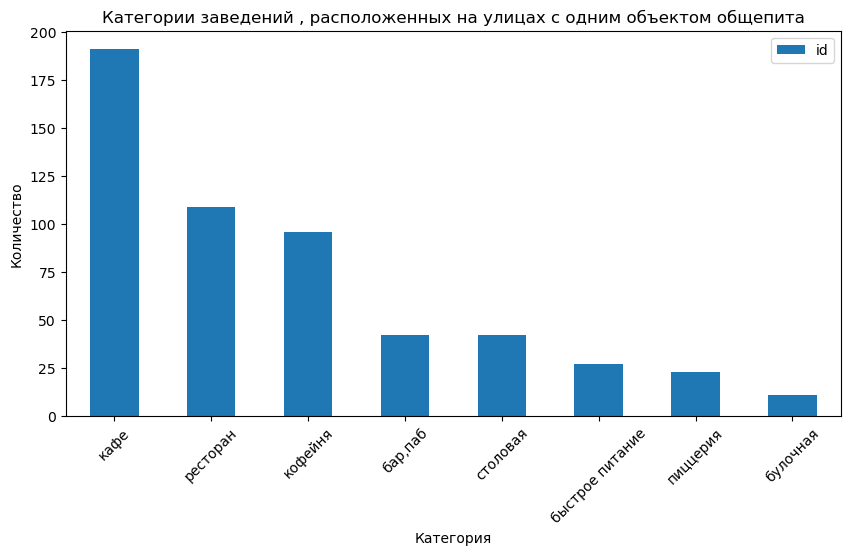

In [66]:
one_obj_data.groupby('category').agg({'id': 'count'}).sort_values(by='id', ascending=False)\
    .plot(kind='bar', figsize=(10, 5))
plt.xlabel('Категория')
plt.ylabel('Количество')
plt.xticks(rotation=45) 
plt.title('Категории заведений , расположенных на улицах с одним объектом общепита')
plt.show();

Самая популярная категория "Кафе", на улицах, в которых расположенно одна заведение общепита. 

### Значение среднего чека

In [67]:
#df.head()

In [68]:
median_bill = df.groupby('district', as_index=False)['middle_avg_bill']\
    .agg('median').sort_values(by='middle_avg_bill', ascending=False)
median_bill

district  middle_avg_bill
1          западный административный округ           1000.0
5       центральный административный округ           1000.0
4   северо-западный административный округ            700.0
2          северный административный округ            650.0
7      юго-западный административный округ            600.0
0         восточный административный округ            575.0
3  северо-восточный административный округ            500.0
8             южный административный округ            500.0
6     юго-восточный административный округ            450.0

Медианные значения дипазонов средних чеков, больше всего в ЗАО и ЦАО. Медина выше, чем у дригих округов из-за большей проходимости и престижности. Самый низкий показатель у ЮВАО. 

### Вывод по исследованию

В данных 8406 точен общественного питания. 
Процентное соотношение заведений по  категориям:
- кафе (28.3%)
- ресторан (24.3%)
- кофейня (16.8%)
- бар,паб (9.1%)
- пиццерия(7.53%)
- быстрое питание (7.17%)
- столовая (3.75%)
- булочная (3.05%)

Распределение посадочных мест по категориям:
- ресторан (92)
- Бар/паб (87)
- Кофейня (81)
- Быстрое питание (76)
- Столовая (76)
- Кафе (74)
- Пиццерия (74)
- Булочная (69)
Несетвых заведений  - 61.9%, сетевые заведения составляют - 38.1%

Категории, в которых сетевых заведений больше, чем несетвых:
- Булочные
- Пиццерии
- Кофейни
Категории, в которых несетевых заведений больше:
- Быстрое питание
- Кафе
- Рестораны
- Столовые
- Бары, пабы
Топ-15 сетевых заведений с наибольшим кол-вом точек:
 -  шоколадница
- домино’c пицца
- Додо пицца
- One price
- Coffin
- Prime
- Кофепорт
- Кулинарная лавка братьев караванных
- Чайхана
- Cofefest
- Буханка
- Му-му
- Drive cafe
- Кофемания
В основном топ состоит из кофеен.
Больше всего заведений в ЦАО. В осном в центре находятся рестораны, кафе, кофейни и бары/пабы. СВАО, ВАО, ЮВАО имеют приблизительно одинаковое кол-во заведений. Меньше всего заведений в СЗАО.

Среднее значение рейтинга по всем категориям: 4.23

Средние показатели рейтинга в каждой категории:
- бар/паб - 4.39
- булочная - 4.27
- быстрое питание - 4.05
- кафе - 4.12
- кофейня - 4.28
- пиццерия - 4.3
- ресторан - 4.29
- столовая - 4.21

Оценки рейтинга полезно брать во внимание. Т.к. По рейтингам и их количеству, можно понять активность посетителей, что может быть полезным для продвижения.

Самые популярные улицы в которых больше всего заведений - проспект Мира, МКАД, Ленинский проспект, проспект Вернадского, Профсоюзная улица. Преобладающая категория - кафе. 

Имеется 541 улица, на которой расположено одно заведение общепита.

Медианные значения дипазонов средних чеков, больше всего в ЗАО и ЦАО ( 1000р). Медина выше, чем у дригих округов из-за большей проходимости и престижности. Самый низкий показатель у ЮВАО(450р.).


## Исследование: открытие кофейни

### Сколько всего кофеен в датасете? В каких районах их больше всего, каковы особенности их расположения?

In [69]:
coffee_shops = df[df['category'] == 'кофейня']
print(f'Всего кофеен:', coffee_shops.shape[0])

Всего кофеен: 1413


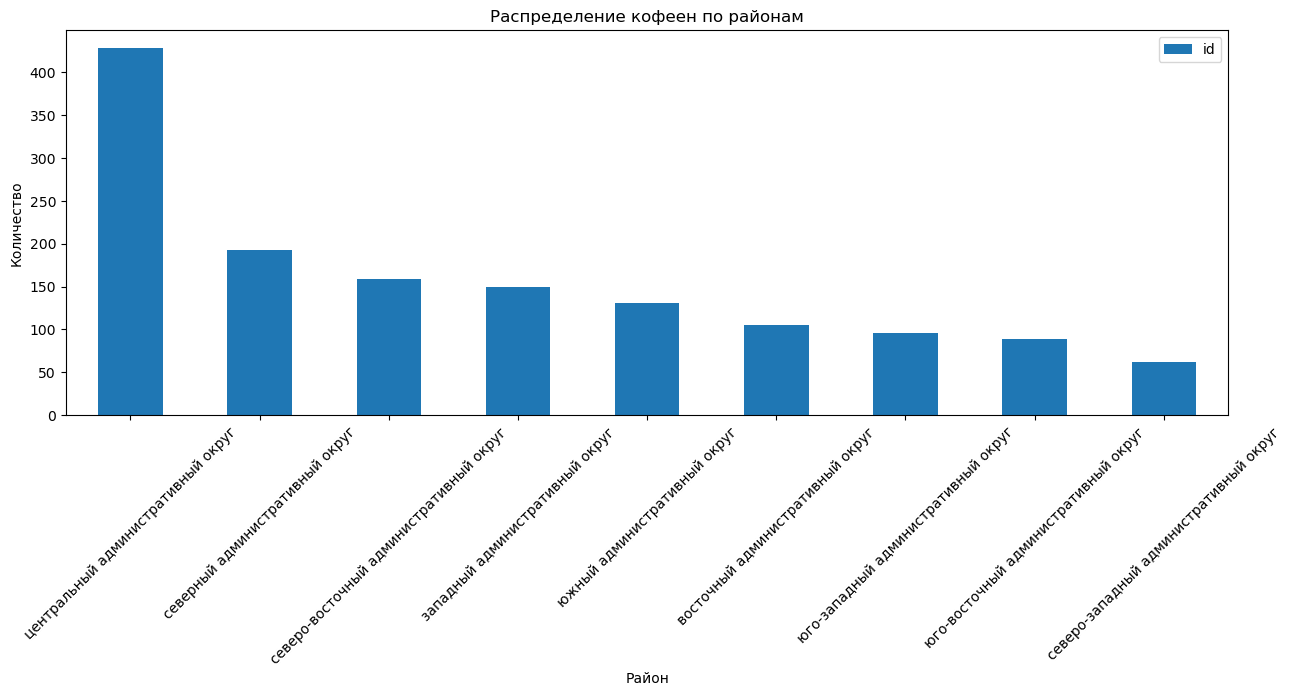

In [70]:
coffee_shops.groupby('district').agg({'id': 'count'}).sort_values(by='id', ascending=False)\
    .plot(kind='bar', figsize=(15, 5))
plt.xlabel('Район')
plt.ylabel('Количество')
plt.xticks(rotation=45) 
plt.title('Распределение кофеен по районам')
plt.show();

Подавляющее большинство кофеен в ЦАО. Далее идут САО, СВАО, ЗАО, ЮАО с похожим друг на друга кол-вом заведений. 

**топ-15 улиц с наибольшим кол-вом кофеен**

In [71]:
df[df['category'] == 'кофейня']\
    .groupby(by='street')['id']\
    .count().sort_values(ascending=False)[:15]

street
 проспект мира             36
 ленинградский проспект    24
 ленинский проспект        23
 профсоюзная улица         18
 проспект вернадского      15
 варшавское шоссе          14
 кутузовский проспект      13
 каширское шоссе           13
 новослободская улица      13
 ленинградское шоссе       13
 новодмитровская улица     12
 дмитровское шоссе         11
 люблинская улица          11
 улица вавилова            10
 бутырская улица            9
Name: id, dtype: int64

**Кол-во кофеен по топ-15 улицам в ЦАО и САО**

**ЦАО**

In [72]:
centr_cofee = coffee_shops.query('district == "центральный административный округ"')\
    .groupby('street')['id'].count().sort_values(ascending=False)[:15]
centr_cofee

street
 проспект мира                   17
 новослободская улица            13
 верхняя красносельская улица     7
 улица земляной вал               7
 усачёва улица                    7
 таганская улица                  6
 комсомольский проспект           6
 садовническая улица              6
 пятницкая улица                  6
 тверская улица                   6
 пресненская набережная           6
 нижний сусальный переулок        6
 улица красная пресня             5
 павелецкая площадь               5
 большой саввинский переулок      5
Name: id, dtype: int64

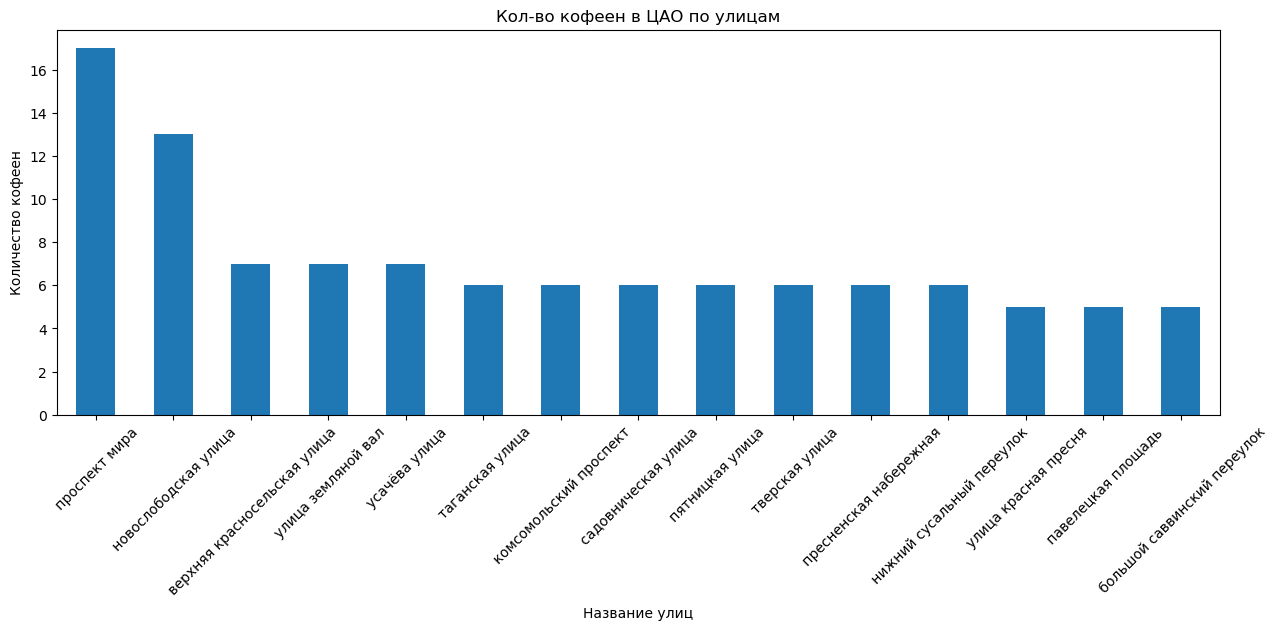

In [73]:
plt.figure(figsize=(15, 5))
centr_cofee.plot(kind='bar', title='Кол-во кофеен в ЦАО по улицам', xlabel='Название улиц', ylabel='Количество кофеен')
plt.xticks(rotation=45)
plt.show()

**САО**

In [74]:
north_cofee = coffee_shops.query('district == "северный административный округ"')\
    .groupby('street')['id'].count().sort_values(ascending=False)[:15]
north_cofee

street
 ленинградский проспект             24
 ленинградское шоссе                13
 головинское шоссе                   8
 смольная улица                      7
 дмитровское шоссе                   7
 хорошёвское шоссе                   6
 фестивальная улица                  6
 ходынский бульвар                   6
 кронштадтский бульвар               6
 бутырская улица                     5
 вятская улица                       4
 волоколамское шоссе                 4
 улица правды                        4
 северный административный округ     3
 локомотивный проезд                 3
Name: id, dtype: int64

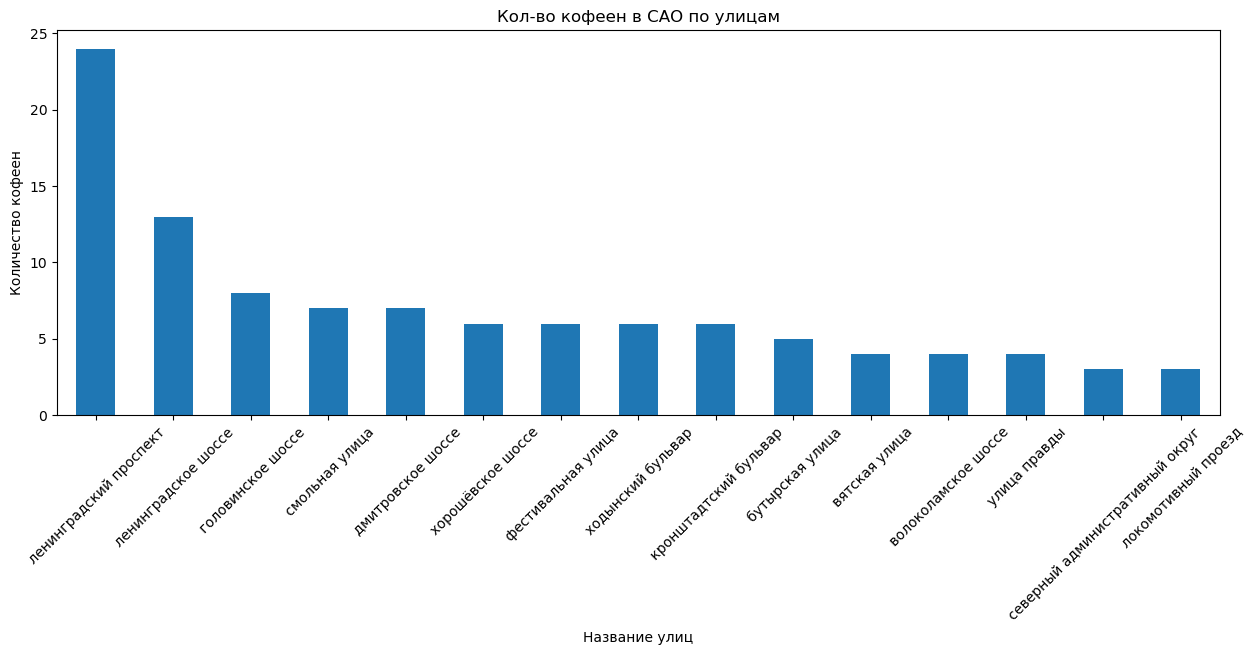

In [75]:
plt.figure(figsize=(15, 5))
north_cofee.plot(kind='bar', title='Кол-во кофеен в САО по улицам', xlabel='Название улиц', ylabel='Количество кофеен')
plt.xticks(rotation=45)
plt.show()

### Круглосуточные кофейни

Переименую колонку "is_27/7", для удобства обращения к ней в дальнейшем.

In [76]:
coffee_shops.rename({'is_24/7': 'is_24_7'}, axis=1, inplace=True)
#coffee_shops.head(1)

/var/folders/91/d9d24bsn2nsc8wq1zngs8mp80000gn/T/ipykernel_56360/4291973672.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Кол-во круглосуточный кофеен

In [77]:
coffee_shops.query('(category == "кофейня") & (is_24_7 == True)')['id'].count()

59

Таблица только с круглосуточными кофейнями

In [78]:
coffee_24_7 = coffee_shops.query('is_24_7 == True')
#coffee_24_7.head()
# еще раз проверю кол-во круглосуточных кофеен
coffee_24_7['name']. count().sum()

59

Выведу количество круглосуточных кофеен в каждом районе.

In [79]:
coffee_24_7.groupby('district')['id'].count().sort_values(ascending=False)

district
центральный административный округ         26
западный административный округ             9
юго-западный административный округ         7
восточный административный округ            5
северный административный округ             5
северо-восточный административный округ     3
северо-западный административный округ      2
юго-восточный административный округ        1
южный административный округ                1
Name: id, dtype: int64

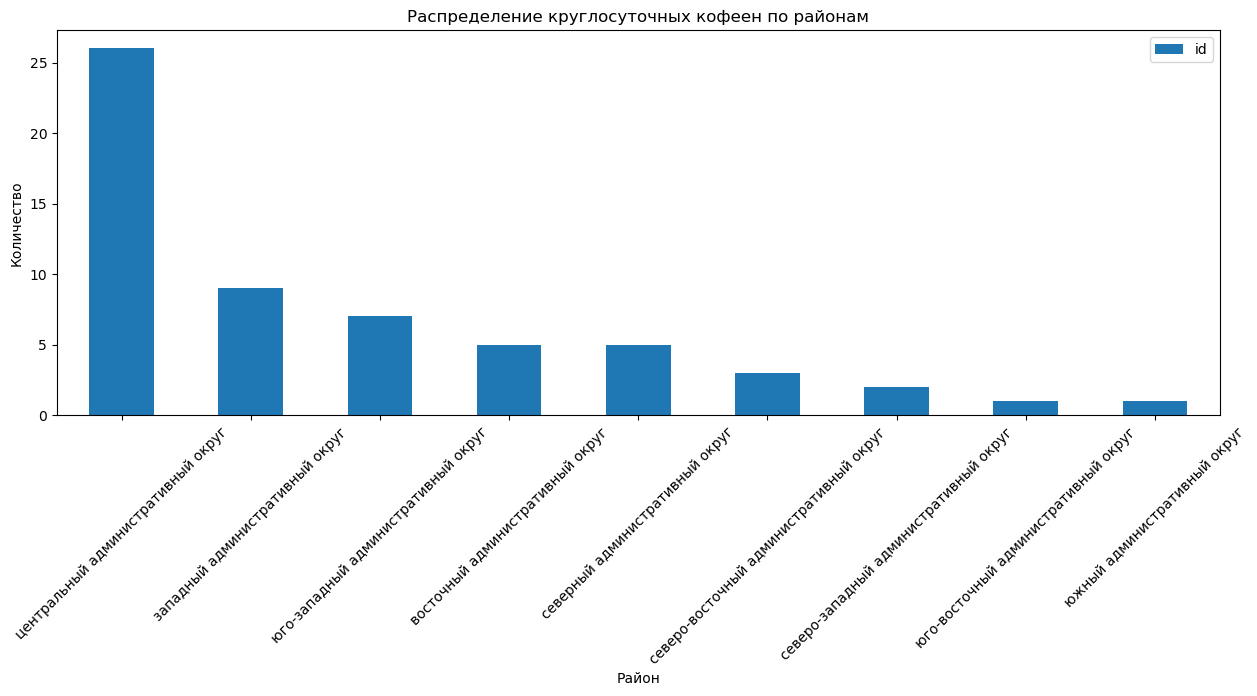

In [80]:
coffee_24_7.groupby('district').agg({'id': 'count'}).sort_values(by='id', ascending=False)\
    .plot(kind='bar', figsize=(15, 5))
plt.xlabel('Район')
plt.ylabel('Количество')
plt.xticks(rotation=45) 
plt.title('Распределение круглосуточных кофеен по районам')
plt.show();

In [81]:
fig = px.bar(coffee_24_7, x='district', title='Кол-во круглосуточных кофеен по районам')
fig.update_xaxes(title_text='Район') 
fig.update_yaxes(title_text='Кол-во')
fig.show()

Большее кол-во круглосуточных кофеен в ЦАО - 26. Следом идет ЗАО - 9 и ЮЗАО - 7. По одной круглосуточной кофейне в ЮВАО и ЮАО.

Буду рассматривать кофейни в ЦАО, только из-за большего их кол-ва, что удобно для анализа. 

In [82]:
cao = coffee_24_7.query('district == "центральный административный округ"')
cao.count()

id                   26
name                 26
category             26
address              26
district             26
hours                26
lat                  26
lng                  26
rating               26
price                15
avg_bill             14
middle_avg_bill       9
middle_coffee_cup     5
chain                26
seats                16
street               26
is_24_7              26
dtype: int64

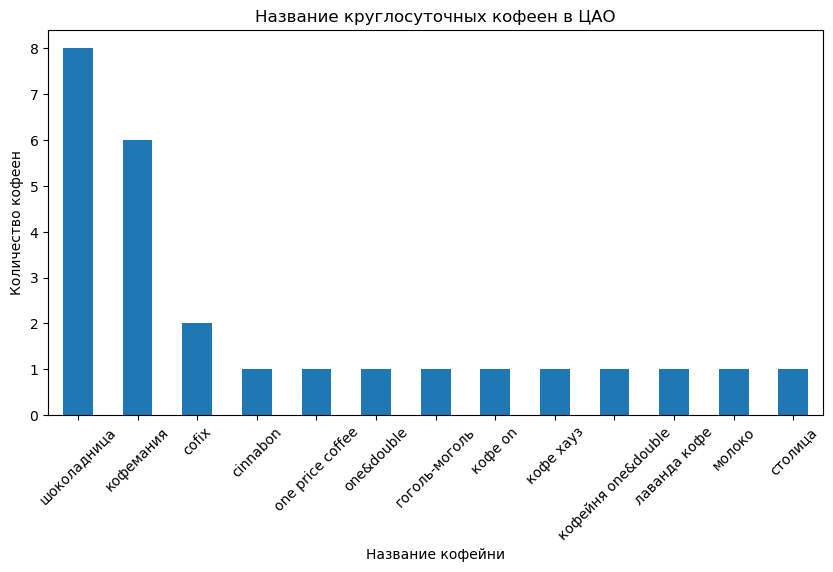

In [83]:
plt.figure(figsize=(10, 5))
cao.groupby('name')['id'].count()\
    .sort_values(ascending=False)\
    .plot(kind='bar', title='Название круглосуточных кофеен в ЦАО',\
          xlabel='Название кофейни', ylabel='Количество кофеен')
plt.xticks(rotation=45)
plt.show()

Круглосуточные кофейни в основном сетевые. Лидеры: "Шоколадница", "Кофемания", "Cofix".

### На какую стоимость чашки капучино стоит ориентироваться при открытии

In [84]:
#coffee_shops.head(0)

Средняя цена чашки каппучино

In [85]:
round(coffee_shops['middle_coffee_cup'].mean(), 2)

175.06

Выведу медианные цены за чашку каппучино по районам

In [86]:
median_coffee_cup = df.groupby('district', as_index=False)['middle_coffee_cup']\
    .agg('median').sort_values(by='middle_coffee_cup', ascending=False)
median_coffee_cup

district  middle_coffee_cup
7      юго-западный административный округ              197.0
5       центральный административный округ              190.0
1          западный административный округ              187.0
3  северо-восточный административный округ              162.5
2          северный административный округ              159.0
4   северо-западный административный округ              150.0
8             южный административный округ              149.5
6     юго-восточный административный округ              145.0
0         восточный административный округ              135.0

Выведу медианный показатель цены за чашку каппучино

In [87]:
round(coffee_shops['middle_coffee_cup'].median(), 2)

170.0

Рассмотрю медианый рейтинг кофеен в САО

In [88]:
sao = coffee_shops.query('(district == "северный административный округ")')

round(sao['rating'].median(), 2)

4.3

### Рекомендация для открытия нового заведения

Всего кофеен 1413. Больше всего кофеен в ЦАО и САО. В ЦАО и ЗАО средний счет в заведении - 1000р. Центральный район во всех городах остается одним из самых дорогих по аренде, а ЗАО -считается престижным районом. Надо учитывать стоимость аренды в этих округах. Всегда есть вероятность столкнуться с административными, бюрократическими и др проблемами при открытии нового бизнеса, так же надо уметь держать свой бизнес на плаву. В связи с этим, в первые месяцы заведение может не выходить "в ноль", что следует учитывать для определения района, в котором предполагается открыть новое заведение. САО примечателен достаточно высоким количеством кофеен, что дает нам возможность выстраивать свою конкурентноспособную ценовую политику. В САО средний счет 650р., медиана по чашке каппучино - 159 рублей. Но,медианный рейтинг заведений - 4.3. Рекомендую рассмотреть для открытия новой кофейни, именно САО, с ценой за чашку каппучино 170 р. Она, чуть выше по медиане среди других заведений, но можно привлекать клиентов сервисом, броским новым дизайном и интерьером, завлекать акциями и сладкими небольшими презентами к кадой купленной чашке каппучино. Круглосуточную кофейню нерекомендую открывать. Во-первых, их по всем Москве совсем мало, что доказывает их неактуальность. Подавляющее большинстве круглосуточных кофеен - сетевые. Кофе, все же способствует бодроствованию, что идет в разрез с привычным образом жизни людей. Вероятней всего, выручка ночью будет меньше дневной и затраты на круглосуточный режим работы выше. Как минимум, оплата рабочего труда, по ночной ставке. 